In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import tensorflow as tf 
import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error , median_absolute_error , r2_score


In [2]:
df = pd.read_csv("Airline_Delay_Cause.csv")
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [8]:
df.isna().sum()

year                   0
month                  0
carrier                4
carrier_name           4
airport                3
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [7]:
df.fillna(df.select_dtypes(include='number').median(), inplace=True)

In [11]:
df.drop(columns=["carrier","airport_name","carrier_name","airport"], inplace = True)
df.head()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [13]:
X = df.drop(columns='arr_flights' , axis = 1)
y = df["arr_flights"]

In [14]:
X

,year,month,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [15]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.33 , random_state=42 , shuffle=True)

In [16]:
print ("X_train_shape is :", X_train.shape) 
print ("X_test_shape is :", X_test.shape) 
print ("y_train_shape is :", y_train.shape) 
print ("y_test_shape is :", y_test.shape) 

X_train_shape is : (213071, 16)
X_test_shape is : (104946, 16)
y_train_shape is : (213071,)
y_test_shape is : (104946,)


In [17]:
model = keras.models.Sequential([
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(128,activation = "relu"),
    keras.layers.Dense(64 , activation= "relu"),
    keras.layers.Dense(32,activation = "relu"),
    keras.layers.Dense(8,activation= "relu"),
    keras.layers.Dense(1,activation="linear")
])

In [18]:
model.compile(
    optimizer="adam",
    loss = "mse",
    metrics=["mse"]
)

In [19]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_train,y_train),
    epochs=100,
    batch_size=10000,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        patience=15,
        monitor='val_loss',
        restore_best_weights=True
    )]
)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 767103.8750 - mse: 767103.8750 - val_loss: 230222.4531 - val_mse: 230222.4531
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 230073.0938 - mse: 230073.0938 - val_loss: 219139.0625 - val_mse: 219139.0625
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 217679.4062 - mse: 217679.4062 - val_loss: 211949.1875 - val_mse: 211949.1875
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 217560.6719 - mse: 217560.6719 - val_loss: 206432.2344 - val_mse: 206432.2344
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 201278.0469 - mse: 201278.0469 - val_loss: 204918.0469 - val_mse: 204918.0469
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 197668.8906 - mse: 197668.8906 - val_loss: 195957.8594 - val_mse: 195957.8594
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 198406.7500 - mse: 198406.7500 - val_loss: 188543.4531 - val_mse: 188543.4688
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,693 (139.43 KB)

 Trainable params: 11,897 (46.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,796 (92.96 KB)

In [21]:
y_pred = model.predict(X_test)

3280/3280 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


In [22]:
y_pred[:10]

array([[  97.16506 ],
       [  96.35808 ],
       [ 531.14386 ],
       [ 127.00058 ],
       [ 186.37302 ],
       [1652.0886  ],
       [  44.63294 ],
       [ 137.35219 ],
       [  16.399555],
       [ 189.9259  ]], dtype=float32)

In [23]:
model_loss , model_accuracy = model.evaluate(X_test,y_test)
print(f"Model Loss is : {model_loss}")
print(f"Model Accuracy is : {model_accuracy}")

3280/3280 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 101325.6484 - mse: 101325.6484
Model Loss is : 103366.546875
Model Accuracy is : 103366.546875


In [24]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


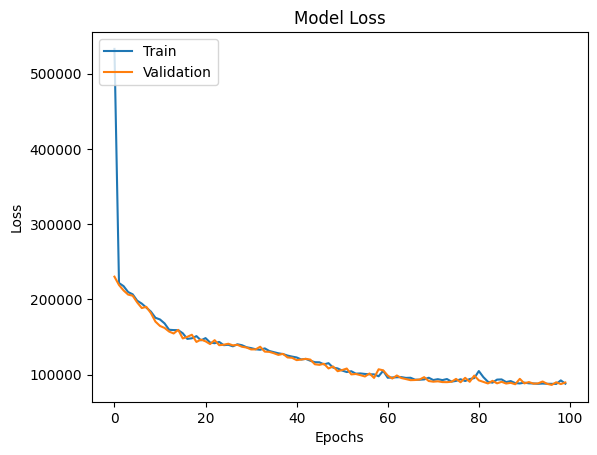

In [26]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend(["Train","Validation"],  loc = 'upper left') 
plt.show()

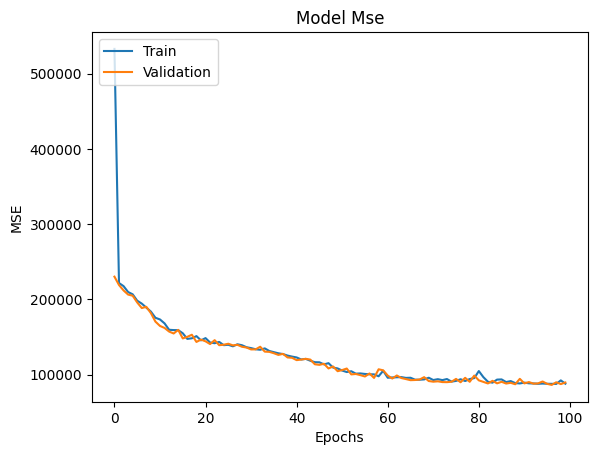

In [27]:
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])

plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Model Mse")
plt.legend(["Train","Validation"] , loc = "upper left")
plt.show()

In [28]:
print('Mean Absolute Error Value is : ', mean_absolute_error(y_test, y_pred) )
print('Mean Squared Error Value is : ', mean_squared_error(y_test, y_pred))
print('Median Absolute Error Value is : ', median_absolute_error(y_test, y_pred))
print('R2 Squared Value is : ', r2_score(y_test, y_pred))

Mean Absolute Error Value is :  108.64457049398209
Mean Squared Error Value is :  103366.4380745524
Median Absolute Error Value is :  34.38714599609375
R2 Squared Value is :  0.9060799448783332
